In [211]:

# multivariate output multi-step 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import Input, TimeDistributed, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape,GRU, LeakyReLU, Reshape,Permute,ConvLSTM2D,ConvLSTM1D,Conv1D	,UpSampling2D,Conv2DTranspose,ZeroPadding2D,UpSampling1D,Cropping1D,Lambda,LSTM,RepeatVector
from keras.models import Model
import matplotlib.pyplot as plt

In [212]:
import pandas as pd

In [213]:
df = pd.read_excel('hal.xlsx', index_col=None)

In [214]:
df.head()

,Sayı,Tarih,PepperPrice,PepperVolume,TomatoPrice,TomatoVolume,PumpkinPrice,PumpkinVolume,CucumberPrice,CucumberVolume
0,0,2018-01-01,1.44,332628,1.50,4171307.0,1.25,447317,1.37,1605149.0
1,1,2018-01-02,1.63,424452,1.57,3738887.0,1.25,311113,1.61,1470628.0
2,2,2018-01-03,1.80,784322,1.91,6983082.0,1.35,857570,1.86,2409035.0
3,3,2018-01-04,1.86,832797,1.90,7541685.0,1.43,865343,2.08,2121188.0
4,4,2018-01-05,1.86,823662,1.74,7487367.0,1.50,867172,1.85,2194635.0


<AxesSubplot: >

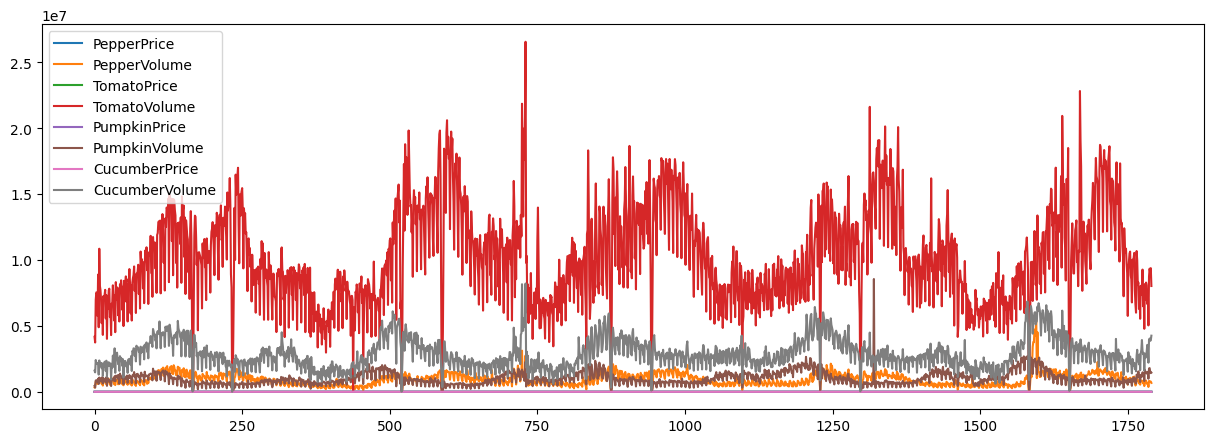

In [215]:
df[['PepperPrice', 'PepperVolume', 'TomatoPrice', 'TomatoVolume', 'PumpkinPrice','PumpkinVolume', 'CucumberPrice', 'CucumberVolume']].plot(figsize=(15,5))

In [216]:
from sklearn.preprocessing import MinMaxScaler

In [217]:
scalerCucumVol = MinMaxScaler()
data = df['CucumberVolume'].to_numpy()
data = data.reshape(-1, 1)
scalerCucumVol.fit(data)
df['CucumberVolume'] = scalerCucumVol.transform(data)

In [218]:
scalerCucumPrice = MinMaxScaler()
data = df['CucumberPrice'].to_numpy()
data = data.reshape(-1, 1)
scalerCucumPrice.fit(data)
df['CucumberPrice'] = scalerCucumPrice.transform(data)

In [219]:
scalerPepperPrice = MinMaxScaler()
data = df['PepperPrice'].to_numpy()
data = data.reshape(-1, 1)
scalerPepperPrice.fit(data)
df['PepperPrice'] = scalerPepperPrice.transform(data)

In [220]:
scalerTomatoPrice = MinMaxScaler()
data = df['TomatoPrice'].to_numpy()
data = data.reshape(-1, 1)
scalerTomatoPrice.fit(data)
df['TomatoPrice'] = scalerTomatoPrice.transform(data)

In [221]:
scalerTomatoVol = MinMaxScaler()
data = df['TomatoVolume'].to_numpy()
data = data.reshape(-1, 1)
scalerTomatoVol.fit(data)
df['TomatoVolume'] = scalerTomatoVol.transform(data)

In [222]:
scalerPumpkinVol = MinMaxScaler()
data = df['PumpkinVolume'].to_numpy()
data = data.reshape(-1, 1)
scalerPumpkinVol.fit(data)
df['PumpkinVolume'] = scalerPumpkinVol.transform(data)

In [223]:
scalerPumpkinPrice = MinMaxScaler()
data = df['PumpkinPrice'].to_numpy()
data = data.reshape(-1, 1)
scalerPumpkinPrice.fit(data)
df['PumpkinPrice'] = scalerPumpkinPrice.transform(data)

In [224]:
scalerPepperVolume = MinMaxScaler()
data = df['PepperVolume'].to_numpy()
data = data.reshape(-1, 1)
scalerPepperVolume.fit(data)
df['PepperVolume'] = scalerPepperVolume.transform(data)

In [225]:
df = df.drop(columns=['Sayı', 'Tarih'])
df.head()

,PepperPrice,PepperVolume,TomatoPrice,TomatoVolume,PumpkinPrice,PumpkinVolume,CucumberPrice,CucumberVolume
0,0.030449,0.057616,0.070470,0.157004,0.067556,0.052136,0.086739,0.194872
1,0.038061,0.073581,0.076342,0.140720,0.067556,0.036214,0.106756,0.178483
2,0.044872,0.136154,0.104866,0.262887,0.075897,0.100093,0.127606,0.292807
3,0.047276,0.144582,0.104027,0.283923,0.082569,0.101002,0.145955,0.257739
4,0.047276,0.142994,0.090604,0.281877,0.088407,0.101216,0.126772,0.266687


In [226]:
df.isnull().any()

PepperPrice       False
PepperVolume      False
TomatoPrice       False
TomatoVolume      False
PumpkinPrice      False
PumpkinVolume     False
CucumberPrice     False
CucumberVolume    False
dtype: bool

In [227]:
df[['PepperPrice', 'PepperVolume', 'TomatoPrice', 'TomatoVolume', 'PumpkinPrice','PumpkinVolume', 'CucumberPrice', 'CucumberVolume']] = df[['PepperPrice', 'PepperVolume', 'TomatoPrice', 'TomatoVolume', 'PumpkinPrice','PumpkinVolume', 'CucumberPrice', 'CucumberVolume']].diff(1)

In [228]:
df = df.iloc[1:, :]

<AxesSubplot: >

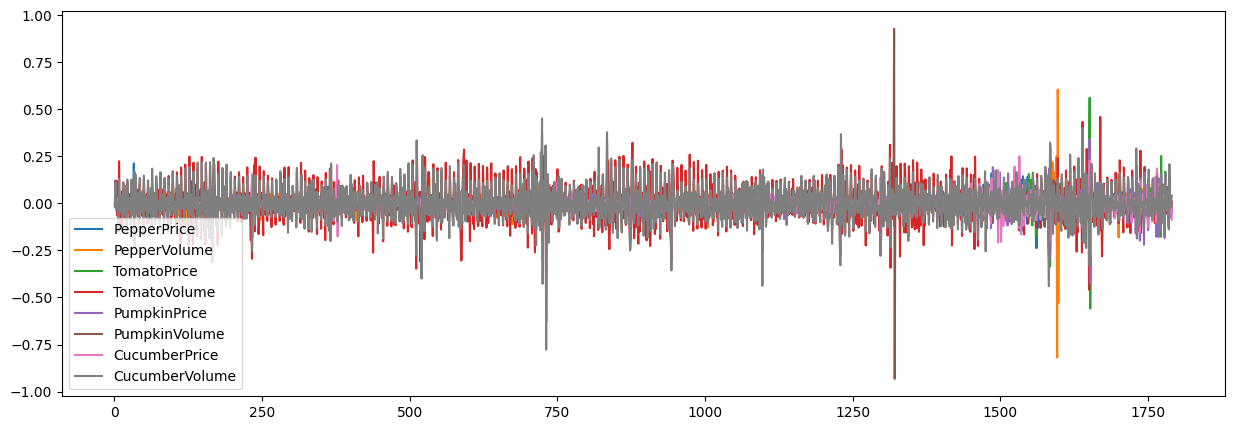

In [229]:
df[['PepperPrice', 'PepperVolume', 'TomatoPrice', 'TomatoVolume', 'PumpkinPrice','PumpkinVolume', 'CucumberPrice', 'CucumberVolume']].plot(figsize=(15,5))

In [230]:
df.isnull().any()

PepperPrice       False
PepperVolume      False
TomatoPrice       False
TomatoVolume      False
PumpkinPrice      False
PumpkinVolume     False
CucumberPrice     False
CucumberVolume    False
dtype: bool

In [231]:

# split a multivariate sequence into samples
def split_sequences(sequences, out_seq, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x = sequences[i:end_ix, :]
        seq_y =  out_seq[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [232]:
# define input sequence
in_seq1 = df['PepperPrice'].to_numpy()
in_seq2 = df['PepperVolume'].to_numpy()
in_seq3 = df['TomatoPrice'].to_numpy()
in_seq4 = df['TomatoVolume'].to_numpy()
in_seq5 = df['PumpkinPrice'].to_numpy()
in_seq6 = df['PumpkinVolume'].to_numpy()
in_seq7 = df['CucumberPrice'].to_numpy()
in_seq8 = df['CucumberVolume'].to_numpy()

In [233]:
out_seq = array([[in_seq1[i],in_seq3[i], in_seq5[i], in_seq7[i]] for i in range(len(in_seq1))])

In [273]:


# out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq1.reshape((len(in_seq1), 1))
in_seq4 = in_seq2.reshape((len(in_seq2), 1))
in_seq5 = in_seq1.reshape((len(in_seq1), 1))
in_seq6 = in_seq2.reshape((len(in_seq2), 1))
in_seq7 = in_seq1.reshape((len(in_seq1), 1))
in_seq8 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8))
# choose a number of time steps
n_steps_in, n_steps_out = 28, 5
# convert into input/output
X, y = split_sequences(dataset, out_seq, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

(1758, 28, 8) (1758, 5, 4)


In [274]:
X.shape
y.shape

(1758, 5, 4)

In [275]:
Ntest = 179
Xtrain, Ytrain = X[:-Ntest], y[:-Ntest]
Xtest, Ytest = X[-Ntest:], y[-Ntest:]

In [276]:
Ytest.shape

(179, 5, 4)

In [277]:
# flatten output
n_output = Ytrain.shape[1] * Ytrain.shape[2]
Ytrain = Ytrain.reshape((Ytrain.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = Xtrain.shape[2]


In [294]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, activation='relu')) # added
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=200, batch_size=16, verbose=0)


In [309]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 27, 64)            1088      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 13, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 11, 32)            6176      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 5, 32)            0         
 g1D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 160)               0         
                                                                 
 dense_19 (Dense)            (None, 50)              

In [295]:
# demonstrate prediction
# Xtest = Xtest.reshape((1, n_steps_in, n_features))
yhat = model.predict(Xtest, verbose=0)
print(yhat)

[[ 0.1230258   0.07989433  0.1786512  ... -0.06374932 -0.06510525
   0.0698859 ]
 [-0.02787344 -0.03696262 -0.00644127 ...  0.01491877 -0.02832931
   0.03541408]
 [ 0.0291389  -0.01878045  0.05722484 ... -0.00066465 -0.01384908
   0.05979426]
 ...
 [ 0.02657851 -0.02199692  0.02872073 ... -0.02116995  0.03147191
  -0.03493967]
 [-0.04661354 -0.02663869 -0.05071666 ...  0.01159718  0.03021562
   0.07122364]
 [ 0.11584327  0.06244537  0.08748914 ...  0.07335152  0.01188337
   0.03347864]]


In [296]:
# Ytest = Ytest.reshape(179,40)
Ytest = Ytest.reshape(179,20)


In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(Ytest, yhat)
mae = mean_absolute_error(Ytest,yhat)
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.004381956831324453
MAE:  0.04155708934181554


In [298]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print(rmse(Ytest, yhat))

0.06619635058917109


In [299]:
#Defining MAPE function
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
print(MAPE(Ytest, yhat))

inf


C:\Users\Cevher\AppData\Local\Temp\ipykernel_8852\2404407343.py:4: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


LSTM but data might require preprocessing

In [300]:
...
# design network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model2.add(Dense(n_output))
model2.compile(loss='mae', optimizer='adam')
# fit network
history = model2.fit(Xtrain, Ytrain, epochs=100, batch_size=16, validation_data=(Xtest,Ytest), verbose=2, shuffle=False);
# plot history


Epoch 1/100
99/99 - 5s - loss: 0.0184 - val_loss: 0.0422 - 5s/epoch - 55ms/step
Epoch 2/100
99/99 - 1s - loss: 0.0182 - val_loss: 0.0420 - 1s/epoch - 12ms/step
Epoch 3/100
99/99 - 1s - loss: 0.0181 - val_loss: 0.0419 - 1s/epoch - 12ms/step
Epoch 4/100
99/99 - 1s - loss: 0.0181 - val_loss: 0.0418 - 1s/epoch - 11ms/step
Epoch 5/100
99/99 - 1s - loss: 0.0180 - val_loss: 0.0418 - 1s/epoch - 11ms/step
Epoch 6/100
99/99 - 1s - loss: 0.0180 - val_loss: 0.0417 - 1s/epoch - 11ms/step
Epoch 7/100
99/99 - 1s - loss: 0.0180 - val_loss: 0.0417 - 1s/epoch - 11ms/step
Epoch 8/100
99/99 - 1s - loss: 0.0179 - val_loss: 0.0415 - 1s/epoch - 11ms/step
Epoch 9/100
99/99 - 1s - loss: 0.0179 - val_loss: 0.0414 - 1s/epoch - 12ms/step
Epoch 10/100
99/99 - 1s - loss: 0.0177 - val_loss: 0.0410 - 1s/epoch - 12ms/step
Epoch 11/100
99/99 - 1s - loss: 0.0175 - val_loss: 0.0404 - 1s/epoch - 11ms/step
Epoch 12/100
99/99 - 1s - loss: 0.0173 - val_loss: 0.0397 - 1s/epoch - 12ms/step
Epoch 13/100
99/99 - 1s - loss: 0.017

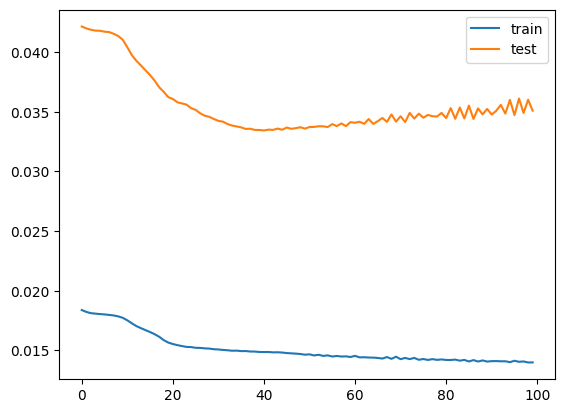

In [301]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [302]:
# make a prediction
yhatlstm = model2.predict(Xtest)


6/6 [==============================] - 1s 6ms/step


In [303]:
yhatlstm.shape

(179, 20)

In [304]:

mae = mean_absolute_error(Ytest,yhatlstm)*100
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.003582373256542685
MAE:  0.03509712967697785


In [305]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print(rmse(Ytest, yhatlstm)*100)

0.059852930225200225


In [306]:
#Defining MAPE function
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [307]:
MAPE(Ytest, yhatlstm)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_8852\2181668549.py:4: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


inf

In [308]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                11800     
                                                                 
 dense_21 (Dense)            (None, 20)                1020      
                                                                 
Total params: 12,820
Trainable params: 12,820
Non-trainable params: 0
_________________________________________________________________
